## Assignment

In this exercise, you'll predict house prices using your model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Split your data into train and test sets.
* Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.
* Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.
* Is the performance of your model satisfactory? Why?
* Try to improve your model in terms of predictive performance by adding or removing some variables.






### Load the **houseprices** data from Thinkful's database. 


In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [57]:
houses_df = pd.concat([houses_df,pd.get_dummies(houses_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
houses_df = pd.concat([houses_df,pd.get_dummies(houses_df.street, prefix="street", drop_first=True)], axis=1)


dummy_column_names = list(pd.get_dummies(houses_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(houses_df.street, prefix="street", drop_first=True).columns)

new_houses = houses_df[['saleprice','overallqual','grlivarea', 'garagecars', 'garagearea','totalbsmtsf','yearbuilt','fullbath','neighborhood','exterqual'] + dummy_column_names]

featureset = [['overallqual','grlivarea','garagecars','totalbsmtsf','mszoning_FV','mszoning_RL'] + dummy_column_names]


In [58]:
#Creating X and Y
    
X = new_houses[['overallqual','grlivarea','garagecars','totalbsmtsf','mszoning_FV','mszoning_RL'] + dummy_column_names]
Y = new_houses['saleprice']


#### Split your data into train and test sets.

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 1168
The number of observations in test set is 292


#### Estimate your model from the previous checkpoint in the train set. Assess the goodness of fit of your model.

In [60]:
# We add constant to the model as it's a best practice
# to do so ever ytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     424.9
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        19:33:57   Log-Likelihood:                -13973.
No. Observations:                1168   AIC:                         2.797e+04
Df Residuals:                    1158   BIC:                         2.802e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.005e+05   2.05e+04     -4.900      

#### Predict the house prices in the test set, and evaluate the performance of your model using the metrics we mentioned in this checkpoint.

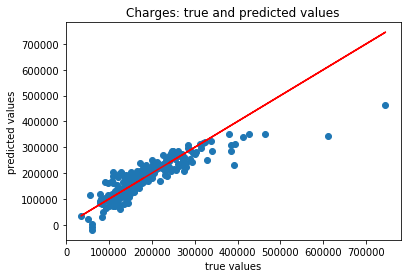

Mean absolute error of the prediction is: 25698.40029906828
Mean squared error of the prediction is: 1560222128.7469144
Root mean squared error of the prediction is: 39499.64719775247
Mean absolute percentage error of the prediction is: 15.661233556978157


In [61]:
# We add constant to the model as it's a best practice
# to do so every time!
X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



#### Is the performance of your model satisfactory? 

_Yes_

**Why?**

_At the visualization above, I can see that the model predicts the lower values of the target better than the higher values. There some higher values that are far from the red line(true values)_


#### Try to improve your model in terms of predictive performance by adding or removing some variables

In [96]:

#Improvements from thinkful solution, creating a interaction feature with two or more related variables

houses_df['totalsf'] = houses_df['totalbsmtsf'] + houses_df['firstflrsf'] + houses_df['secondflrsf']
houses_df['int_over_sf'] = houses_df['totalsf'] * houses_df['overallqual']

#Creating feature set for X
X = houses_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'int_over_sf'] + dummy_column_names]

# Y is the target variable
Y = np.log1p(houses_df['saleprice'])

#WHY IS THIS FUNCTION FOR? THINKFUL USED IT IN THE EXAMPLE
#Y = np.log1p(houses_df['saleprice'])




In [97]:
# We add constant to the model as it's a best practice
# to do so every time!
X = sm.add_constant(X)

#Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


results = sm.OLS(y_train, X_train).fit()
results.summary()



The number of observations in training set is 1168
The number of observations in test set is 292


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     520.9
Date:                Tue, 13 Aug 2019   Prob (F-statistic):               0.00
Time:                        20:40:28   Log-Likelihood:                 463.99
No. Observations:                1168   AIC:                            -904.0
Df Residuals:                    1156   BIC:                            -843.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           9.9162      0.102     97.518      0.000       9.717      10.116
overallqual     0.1893      0.009     20.123      0.000       0.171       0.208
grlivarea     9.58e-05   1.89e-05      5.074      0.000    5.88e-05       0.000
garagecars      0.0779      0.015      5.244      0.000       0.049       0.107
garagearea      0.0001   5.04e-05      2.132      0.033    8.57e-06       0.000
totalsf         0.0003   2.58e-05     11.139      0.000       0.000       0.000
int_over_sf -2.572e-05   3.02e-06     -8.526      0.000   -3.16e-05   -1.98e-05
mszoning_FV     0.3911      0.065      6.055      0.000       0.264       0.518
mszoning_RH     0.2650      0.074      3.593      0.000       0.120       0.410
mszoning_RL     0.3879      0.060      6.481      0.000       0.270       0.505
mszoning_RM     0.2155      0.061      3.556      0.000       0.097       0.334
street_Pave    -0.0556      0.075     -0.744      0.457      -0.202       0.091
==============================================================================
Omnibus:                      350.711   Durbin-Watson:                   1.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2714.386
Skew:                          -1.167   Prob(JB):                         0.00
Kurtosis:                      10.094   Cond. No.                     5.33e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.33e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

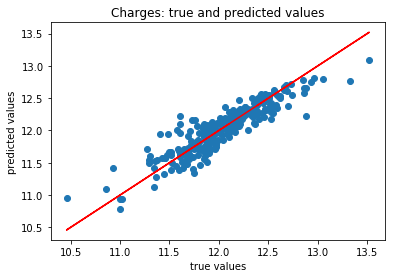

Mean absolute error of the prediction is: 0.12570372872853608
Mean squared error of the prediction is: 0.02919212187130334
Root mean squared error of the prediction is: 0.17085702172080414
Mean absolute percentage error of the prediction is: 1.0503577667818331


In [99]:
#Predict the house prices and evaluate the performance of your model using the metrics 
#we mentioned in this checkpoint.

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))



-------------------------------------------------
By: Wendy Navarrete

8/13/2019